In [2]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

diabetes=datasets.load_diabetes()

Primero cargamos los datos de la librería

In [3]:
df=pd.DataFrame(data=diabetes['data'], columns=diabetes['feature_names'])
df_no_target=df.copy()
df['target']=diabetes['target']
diabetes['feature_names'].append('target')
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


Ahora hemos incluido la variable a predecir (target) en el dataframe para poder comparar su distribución a la de los datos. Comprobamos que estos últimos están distribuidos con media 0 y varianza 0.04, mientras que el "target" no sigue esa misma distribución. Por eso mismo se han considerado dos posibilidades, la de la normalización de los datos (target incluido), y la estandarización de los mismos.

In [6]:
scaler=StandardScaler()
X =scaler.fit_transform(df.values)
#diabetes['feature_names'].pop('target')
#diabetes['feature_names'].remove('target')
XBien=pd.DataFrame(data=X, columns=diabetes['feature_names'])
XBienData=XBien
XTarget=XBienData.pop('target')
XBien.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-9.544904e-18,-4.219852e-17,-5.525997e-17,-4.822688e-17,5.525997e-18,-1.356381e-17,-2.813235e-17,-1.484484e-16,-1.849325e-17,-2.675085e-17
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00
min,-2.254290e+00,-9.385367e-01,-1.897929e+00,-2.363066e+00,-2.665411e+00,-2.430626e+00,-2.150883e+00,-1.606102e+00,-2.651046e+00,-2.896390e+00
25%,-7.841722e-01,-9.385367e-01,-7.196249e-01,-7.706577e-01,-7.200196e-01,-6.382488e-01,-7.382960e-01,-8.303008e-01,-6.990157e-01,-6.975491e-01
50%,1.131724e-01,-9.385367e-01,-1.531324e-01,-1.192178e-01,-9.084100e-02,-8.029125e-02,-1.384305e-01,-5.449919e-02,-4.094666e-02,-2.265729e-02
75%,8.005001e-01,1.065488e+00,6.569519e-01,7.493688e-01,5.961931e-01,6.274425e-01,6.162390e-01,7.213025e-01,6.818695e-01,5.869224e-01
max,2.327895e+00,1.065488e+00,3.585718e+00,2.776071e+00,3.235851e+00,4.179278e+00,3.809072e+00,3.894331e+00,2.808758e+00,2.851075e+00


Estandarizamos todo y separamos la variable a predecir otra vez. Se muestra una tabla con la descripción del dataframe obtenido para comprobar que no se haya cometido ningún error.

In [9]:
scaler2 = Normalizer()
Y = scaler2.fit_transform(df.values)
YBien = pd.DataFrame(data=Y, columns=diabetes['feature_names']) 
YBienData=YBien
YTarget=YBienData.pop('target')
YBien.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,-0.000047,-0.000011,-0.000119,-0.000090,-0.000059,-0.000055,0.000095,-0.000104,-0.000134,-0.000077
std,0.000465,0.000496,0.000436,0.000465,0.000473,0.000479,0.000543,0.000460,0.000489,0.000456
min,-0.001987,-0.001786,-0.001712,-0.002071,-0.002722,-0.002890,-0.001129,-0.002065,-0.002243,-0.001992
25%,-0.000294,-0.000337,-0.000340,-0.000317,-0.000266,-0.000251,-0.000205,-0.000348,-0.000320,-0.000285
50%,0.000036,-0.000159,-0.000047,-0.000040,-0.000025,-0.000024,-0.000045,-0.000020,-0.000012,-0.000005
75%,0.000240,0.000337,0.000166,0.000213,0.000175,0.000187,0.000260,0.000171,0.000183,0.000173
max,0.001322,0.001299,0.001298,0.002034,0.001816,0.002367,0.003890,0.002205,0.001214,0.001651


Hacemos lo mismo esta vez normalizando los datos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5F1762E10>,
      dtype=object)

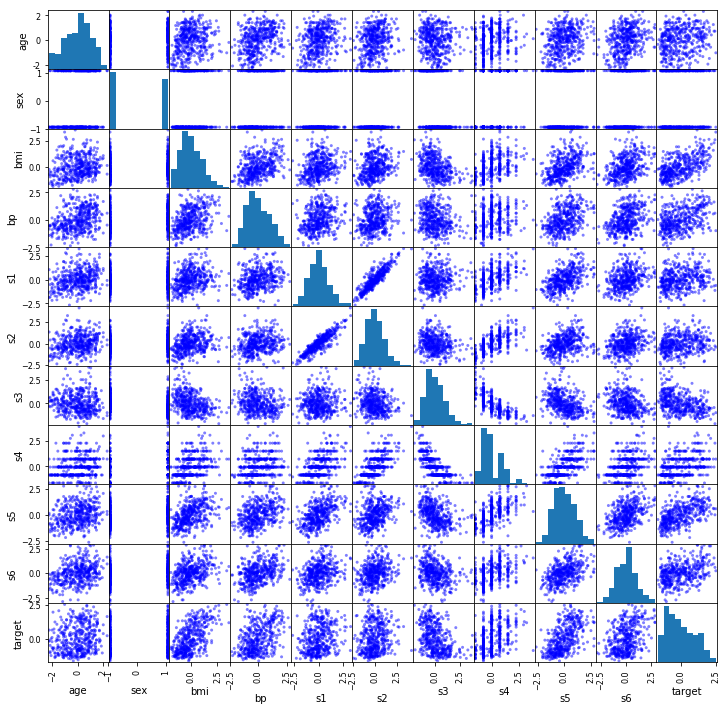

In [16]:
from pandas.plotting import scatter_matrix
XBienConTarget=XBien
XBienConTarget['target']=XTarget
colors = { 'blue'}
scatter_matrix(XBienConTarget, figsize = (12, 12), diagonal = 'hist', color=colors)

Hemos presentado la matriz de dispersión para los datos estandarizados, observamos que hay correlación entre las medidas de suero sanguíneo tomadas en las semanas 1 y 2, por lo que podríamos prescindir de una de estas variables. Así mismo la variable a predecir no parecer tener relación alguna con el resto de variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5FB337A58>,
      dtype=object)

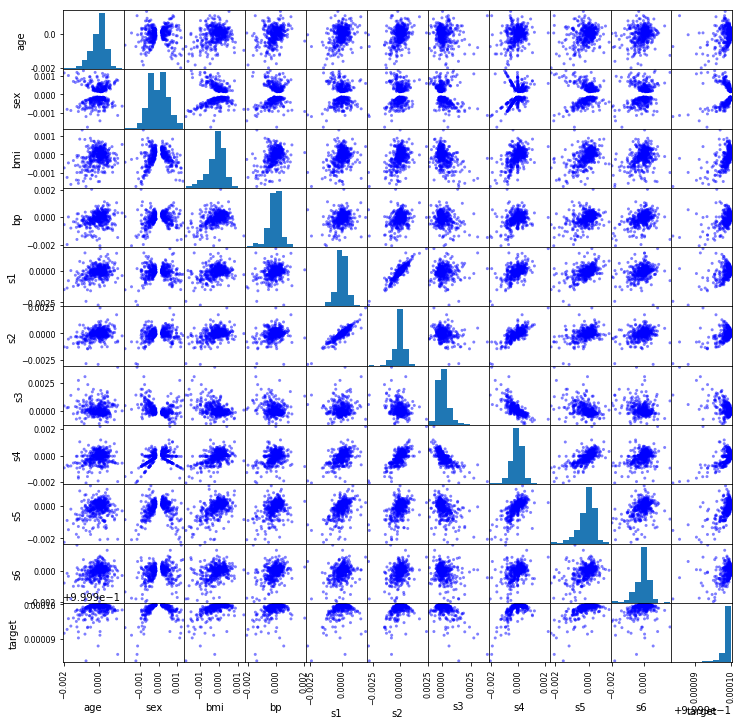

In [49]:
from pandas.plotting import scatter_matrix
YBienConTarget=YBien
YBienConTarget['target']=YTarget
colors = { 'blue'}
scatter_matrix(YBienConTarget, figsize = (12, 12), diagonal = 'hist', color=colors)

Realizando el mismo proceso con los datos normalizados observamos la misma correlación entre s1 y s2, y continuamos sin apreciar ninguna relación entre "target" y otra variable.

Comparando las dos matrices de dispersión hemos decidido realizar los cálculos con los datos presentes en la primera, pues nos parecen considerablemente más realistas. Por ejemplo sí que se considera el género como una variable binaria, cosa que perdemos al normalizar la muestra. Esto causa las simetrías en las gráficas de la fila del sexo, pues tiene sentido que las muestras de suero sanguíneo sean parecidas en hombres y mujeres a la hora de estudiar una enfermedad que afecta a ambos sexos de forma similar.

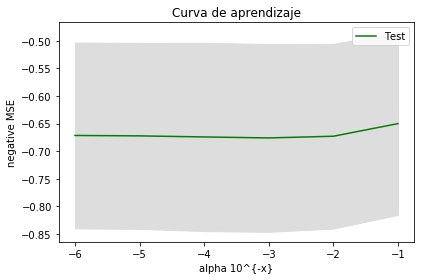

In [32]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
alphas = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
cv_scores_mean=[]
cv_scores_std=[]

for alpha in alphas:
    mlp = MLPRegressor(hidden_layer_sizes=(200, ), 
                       activation='relu', 
                       solver='adam', 
                       alpha=alpha, 
                       batch_size='auto',
                       max_iter=10000,
                       verbose=False,
                       random_state=0)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, XBienData, XTarget.ravel(), 
                             cv=10, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())
    

plt.plot(np.log10(alphas), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit=np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(alphas), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("alpha 10^{-x}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Se ha presentado una gráfica que nos relaciona el error cuadrático medio negativo con el parámetro alpha elegido durante la ejecución de la red neuronal. Nos interesa que el error cuadrático negativo sea lo más alto posible (pues el error cuadrático positivo será más pequeño en este caso). En cualquier caso observamos que los errores rondan valores en un entorno de -0.66, que es un número muy bajo teniendo en cuenta que los valores del target están entre -2 y 2 (recordamos que el error cuadrático medio es igual a la suma de las distancias entre los puntos predichos y los reales al cuadrado dividido entre el número de elementos). Aún así para ejecutar la red neuronal definitiva posteriormente se escogerá un valor de 0.1 para alpha.

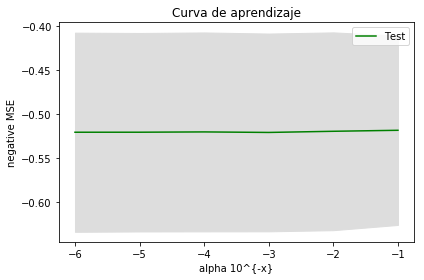

In [42]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

alphas = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
cv_scores_mean=[]
cv_scores_std=[]

for alpha in alphas:
    mlp = MLPRegressor(hidden_layer_sizes=(10, 10,), 
                       activation='relu', 
                       solver='adam', 
                       alpha=alpha, 
                       batch_size='auto',
                       max_iter=10000,
                       verbose=False,
                       random_state=0)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, XBienData, XTarget.ravel(), 
                             cv=10, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

plt.plot(np.log10(alphas), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit=np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(alphas), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("alpha 10^{-x}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()    

Observamos una curva de aprendizaje más equilibrada que en el caso anterior. Tanto, que resulta complicado escoger un mejor valor para alpha. Eligiremos una valor de 0.01 por parecernos el error un poco mayor.

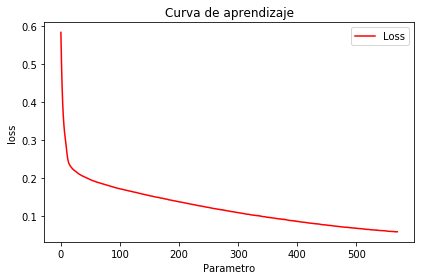

0.9222676733673574
0.1468727453491705


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(XBienData, XTarget, 
                                                    test_size=0.3, random_state=0)
max_iter = 20000
mlpX2 = MLPRegressor(hidden_layer_sizes=(200, ),  # sólo 1 capa oculta de 200 neuronas
                   activation='relu',           # función de activación para las capas ocultas
                   solver='adam',               # algoritmo para descenso de gradiente
                   alpha=0.1,                   # mide cuánto cambiamos los parámetros en cada actualización
                   batch_size='auto',           # por defecto 200
                   max_iter=max_iter,           # número de pasadas por los datos de entrada 
                   verbose=False)               # mostrar loss después de cada pasada
mlpX2.fit(X_train, y_train)

plt.plot(range(0,mlpX2.n_iter_), mlpX2.loss_curve_, color="r",  label="Loss")
plt.title("Curva de aprendizaje")
plt.xlabel("Numero de iteraciones"), plt.ylabel("loss"), plt.legend(loc="best")
plt.tight_layout()
plt.show()  

# Calculamos el coeficiente R^2 del modelo para entrenamiento 
#test (mejor valor es 1)
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor.score
print(mlpX2.score(X_train, y_train))
print(mlpX2.score(X_test, y_test))
# Pintar la evolución de la función de loss

Observamos que la pérdida es menor cuanto mayor es el número de iteraciones; lo cual tiene bastante sentido pues intuitivamente a mayor número de iteraciones mejor entrenada estará nuestra red. Podemos añadir además que el decrecimiento de esta función parece ser exponencial, aunque hay un punto (menor a 30) en el que se estabiliza considerablemente.
Respecto a la "puntuación" los valores son de 0.94 en los datos de entrenamiento y de 0.14 en los de prueba. Teniendo en cuenta que el mejor valor para este estimador es 1, lo obtenido en el entrenamiento parece cercano al óptimo. Por otra parte el valor obtenido para los casos de prueba no es tan malo, pues sigue siendo positivo lo que significa que el error cuadrático medio es menor a la varianza de los datos.

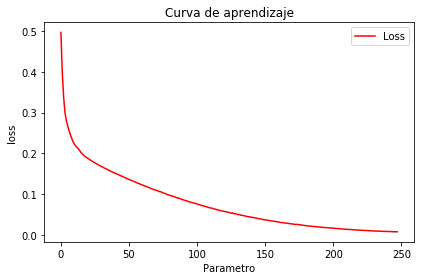

0.9884213249720768
0.012240132941020887


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
'''Con la normal(0,1)'''

X_train, X_test, y_train, y_test = train_test_split(XBienData, XTarget, 
                                                    test_size=0.3, random_state=0)
max_iter = 20000
mlpY2 = MLPRegressor(hidden_layer_sizes=(100, 100),  # sólo 1 capa oculta de 200 neuronas
                   activation='relu',           # función de activación para las capas ocultas
                   solver='adam',               # algoritmo para descenso de gradiente
                   alpha=0.001,                 # mide cuánto cambiamos los parámetros en cada actualización
                   batch_size='auto',           # por defecto 200
                   max_iter=max_iter,           # número de pasadas por los datos de entrada 
                   verbose=False)               # mostrar loss después de cada pasada
mlpY2.fit(X_train, y_train)
plt.plot(range(0, mlpY2.n_iter_), mlpY2.loss_curve_, color="r",  label="Loss")
plt.title("Curva de aprendizaje")
plt.xlabel("Numero de iteraciones"), plt.ylabel("loss"), plt.legend(loc="best")
plt.tight_layout()
plt.show()  

# Calculamos el coeficiente R^2 del modelo para entrenamiento 
#test (mejor valor es 1)
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor.score
print(mlpY2.score(X_train, y_train))
print(mlpY2.score(X_test, y_test))
# Pintar la evolución de la función de loss

En este caso la gráfica se asemeja más a la de una exponencial, pues no se aprecia que el decrecimiento varíe bruscamente en ningún momento.
La puntuación de los casos de entrenamiento es cercana a 1, lo que nos dice que el error cuadrático medio se aproxima a 0; mientras que el del test es casi 0. Intuitivamente esto nos dice que el error cuadrático medio es muy parecido a la varianza de la muestra, es decir que la red neuronal ha conseguido adaptarse bastante bien a la distribución de la muestra.

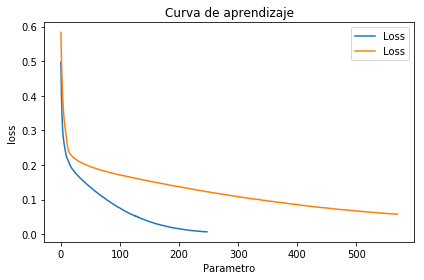

In [29]:
plt.plot(range(0, mlpY2.n_iter_), mlpY2.loss_curve_,mlpX2.loss_curve_,  label="Loss")
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("loss"), plt.legend(loc="best")
plt.tight_layout()
plt.show()  

Observamos que la segunda red neuronal parece tener un mejor comportamiento que la primera. Esto puede parecer antiintuitivo, pues la primera tiene 10 veces más neuronas que la última. No obstante al tener más capas estamos ayudando a la red a distinguir relaciones entre las distintas variables, lo cual parece ser bastante positivo en este caso.

In [ ]:
plt.scatter(boston.target, predicts) 
# Pintamos la referencia de la predicción perfecta
plt.plot(boston.target, boston.target, color='k') 

plt.title('Y Vs Y_pred')